## Описание проекта
    Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
    Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
   Описание тарифов:
#### Тариф «Смарт»
Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

минута разговора: 3 рубля

сообщение: 3 рубля

1 Гб интернет-трафика: 200 рублей
####  Тариф «Ультра»
Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

минута разговора: 1 рубль

сообщение: 1 рубль

1 Гб интернет-трафика: 150 рублей

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import datetime
import math as mth
import matplotlib.pyplot as plt
import seaborn
import datetime
import numpy as np
import scipy.stats as st
from scipy import stats as st

In [2]:
df_calls =pd.read_csv ('https://code.s3.yandex.net/datasets/calls.csv')
df_internet = pd.read_csv ('https://code.s3.yandex.net/datasets/internet.csv')
df_messages =pd.read_csv ('https://code.s3.yandex.net/datasets/messages.csv')
df_tariffs =pd.read_csv ('https://code.s3.yandex.net/datasets/tariffs.csv')
df_users =pd.read_csv ('https://code.s3.yandex.net/datasets/users.csv')

In [3]:
df_calls.info()
df_internet.info()
df_messages.info()
df_tariffs.info()
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 co

In [4]:
df_calls.head(5)


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
df_internet.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
df_messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
df_tariffs.head(5)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
df_users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


### Шаг 2. Подготовьте данные

2.1 df_users - Логично будет начать с таблицы пользователей.

In [9]:
print(df_users['user_id'].count())
print(df_users.duplicated().sum())

500
0


Число строк мы уже видели, а число пользователей гораздо меньше.

2.2 df_tariffs - тарифные планы. Без пропусков.

In [10]:
df_messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

2.3 df_messages - сообщения. Пропусков нет. Проверим на дубликаты.

In [11]:
print(df_messages.duplicated().sum())

0


2.4 df_internet - таблица расхода интернет трафика без нарушений.

2.5 df_calls - Таблица звонки без нарушений. По условию нулевые значения в разговорах - это неотвеченные вызовы.

Применим "datetime" ко всем таблицам. Так же сразу добавим колонку месяц.

In [12]:
def date(df):
    for col in df:
        for column in col.columns:
            if 'date' in column and column != 'churn_date':
                col[column] = pd.to_datetime(col[column], format='%Y-%m-%d')
                col['month'] = col[column].apply(lambda x: x.month)
date([df_users, df_calls, df_messages, df_internet])

In [13]:
df_users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


<AxesSubplot:>

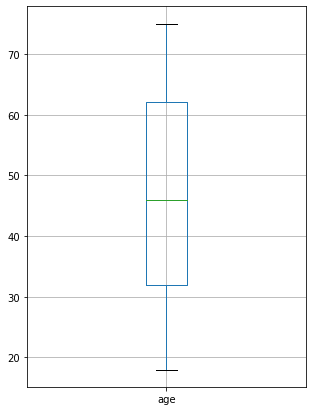

In [14]:
df_users.boxplot(column = 'age', grid=True, figsize=(5, 7))

<AxesSubplot:>

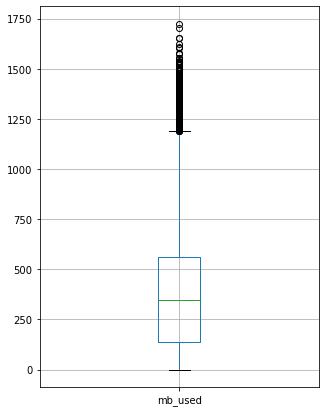

In [15]:
df_internet.boxplot(column = 'mb_used', grid=True, figsize=(5, 7))

<AxesSubplot:>

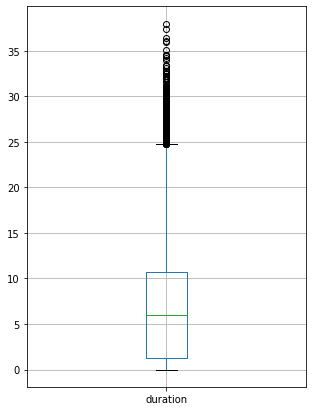

In [16]:
df_calls.boxplot(column = 'duration', grid=True, figsize=(5, 7))

Проведя анализ на выбросы через ящик с усами нарушеий и критических значений не обнаружено.

### Шаг 2.1 Посчитайте для каждого пользователя:

#### 2.1.1 
####          Количество сделанных звонков и израсходованных минут разговора по месяцам.
####          Количество отправленных сообщений по месяцам.
####          Oбъем израсходованного интернет-трафика по месяцам

In [17]:
#df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls['duration'] = df_calls['duration'].astype('int')

In [18]:
#Создадим сводный датафрейм.
calls = df_calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum'])
messages = df_messages.groupby(['user_id','month'])['id'].count()
internet = df_internet.groupby(['user_id', 'month']).sum()['mb_used']
df_uni= pd.concat([calls, messages, internet], axis=1)
df_uni= df_uni.reset_index()
df_uni.head()
print(df_uni.shape)

(3214, 6)


In [19]:
df_u = df_uni.merge(df_users, on=['user_id'], how='outer')
df_u.isna().sum()
df_u.head()

,user_id,month_x,count,sum,id,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,month_y
0,1000,5.0,22.0,142.0,22.0,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1000,6.0,43.0,144.0,60.0,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
2,1000,7.0,47.0,299.0,75.0,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
3,1000,8.0,52.0,367.0,81.0,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
4,1000,9.0,58.0,421.0,57.0,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5


In [20]:
# Переименуем столбцы, что бы было понятно
df_u.columns = ['User_id', 'Месяц', 'Кол-во звонков, шт.', 'Звонки, мин.', 
                            'СМС, шт.', 'Интернет, Мб', 'Возраст','Прекращение обсл','Город', 'Имя', 'Фамилия', 'Начало обсл', 'Тариф', 'month_y']
df_u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   User_id              3216 non-null   int64         
 1   Месяц                3214 non-null   float64       
 2   Кол-во звонков, шт.  3174 non-null   float64       
 3   Звонки, мин.         3174 non-null   float64       
 4   СМС, шт.             2717 non-null   float64       
 5   Интернет, Мб         3203 non-null   float64       
 6   Возраст              3216 non-null   int64         
 7   Прекращение обсл     189 non-null    object        
 8   Город                3216 non-null   object        
 9   Имя                  3216 non-null   object        
 10  Фамилия              3216 non-null   object        
 11  Начало обсл          3216 non-null   datetime64[ns]
 12  Тариф                3216 non-null   object        
 13  month_y              3216 non-nul

В некоторых колонках есть пропуски - это значит, что абоненты не пользовались услугами в данном месяце.

In [21]:
# Честно заменим пропуски на нули.
df_u = df_u.fillna(0)

Так же у нас есть два победителя которые просто не стали пользоваться услугами оператора.

In [22]:
df_u = df_u.drop(df_u[df_u['Месяц']==0].index)

Bычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану

In [23]:
tariff = {'smart': 550, 'ultra': 1950}
df_u['Абонентская плата'] = df_u['Тариф'].map(tariff)
df_u.head()

,User_id,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Возраст,Прекращение обсл,Город,Имя,Фамилия,Начало обсл,Тариф,month_y,Абонентская плата
0,1000,5.0,22.0,142.0,22.0,2253.49,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1950
1,1000,6.0,43.0,144.0,60.0,23233.77,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1950
2,1000,7.0,47.0,299.0,75.0,14003.64,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1950
3,1000,8.0,52.0,367.0,81.0,14055.93,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1950
4,1000,9.0,58.0,421.0,57.0,14568.91,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1950


In [24]:
# Функции для звонков, смс и интернета.
def calls(row):
    if row['Тариф'] == 'smart':
        result = row['Звонки, мин.'] - 500
        return np.where(result > 0, result, 0)
    else:
        result = row['Звонки, мин.'] - 3000
        return np.where(result > 0, result, 0)
    
    
def sms(row):
    if row['Тариф'] == 'smart':
        result = row['СМС, шт.'] - 50
        return np.where(result > 0, result, 0)
    else:
        result =  row['СМС, шт.'] - 1000
        return np.where(result > 0, result, 0)
    

def internet(row):
    if row['Тариф'] == 'smart':
        result = row['Интернет, Мб'] - 15 * 1024
        return np.where(result > 0, result, 0)
    else:
        result = row['Интернет, Мб'] - 30 * 1024
        return np.where(result > 0, result, 0)

In [25]:
# Функции для переплаты.
def month_operation(row):
    sum_operation = 0
    if row['Тариф'] == 'smart':
        sum_operation += np.ceil(row['Минут больше']) * 3
        sum_operation += np.ceil(row['СМС больше']) * 3
        sum_operation += np.ceil(row['Мб больше']/1024) * 200
        return sum_operation
    
    else:
        sum_operation += np.ceil(row['Минут больше']) * 1
        sum_operation += np.ceil(row['СМС больше']) * 1
        sum_operation += np.ceil(row['Мб больше']/1024) * 150
        return sum_operation

In [26]:
df_u['Минут больше'] = df_u.apply(calls, axis=1)
df_u['СМС больше'] = df_u.apply(sms, axis=1)
df_u['Мб больше'] = df_u.apply(internet, axis=1)

df_u['Плата больше, руб.'] = df_u.apply(month_operation, axis=1)

for column in ['Минут больше', 'Мб больше']:
    df_u[column] = df_u[column].astype('float')

for column in ['СМС больше', 'Плата больше, руб.']:
    df_u[column] = df_u[column].astype('int')

In [27]:
df_u['Звонки, мин.'] = df_u['Звонки, мин.'].astype('int')
df_u['Минут больше'] = df_u['Минут больше'].astype('int')
df_u['СМС, шт.'] = df_u['СМС, шт.'].astype('int')

Отдельное спасибо Кириллу Талалаеву - без этой подсказки (np.ceil) код ложиться не хотел. (Хоть подсказка была и не мне)

In [28]:
df_u.head()

,User_id,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Возраст,Прекращение обсл,Город,Имя,Фамилия,Начало обсл,Тариф,month_y,Абонентская плата,Минут больше,СМС больше,Мб больше,"Плата больше, руб."
0,1000,5.0,22.0,142,22,2253.49,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1950,0,0,0.0,0
1,1000,6.0,43.0,144,60,23233.77,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1950,0,0,0.0,0
2,1000,7.0,47.0,299,75,14003.64,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1950,0,0,0.0,0
3,1000,8.0,52.0,367,81,14055.93,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1950,0,0,0.0,0
4,1000,9.0,58.0,421,57,14568.91,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1950,0,0,0.0,0


In [29]:
print('Общая выручка по тарифному плану Ultra', (df_u['Тариф']=='ultra').sum()*1950)
print('Общая выручка по тарифному плану Smart', (df_u['Тариф']=='smart').sum()*550)

Общая выручка по тарифному плану Ultra 1920750
Общая выручка по тарифному плану Smart 1225950


И без графиков понятно, что базовая выручка по тарифному плану "Ультра" больше почти на половину.

Посчитаем итоговую сумму.

In [30]:
df_u['Итоговая сумма, руб'] = df_u['Абонентская плата'] + df_u['Плата больше, руб.']
df_u.head()

,User_id,Месяц,"Кол-во звонков, шт.","Звонки, мин.","СМС, шт.","Интернет, Мб",Возраст,Прекращение обсл,Город,Имя,Фамилия,Начало обсл,Тариф,month_y,Абонентская плата,Минут больше,СМС больше,Мб больше,"Плата больше, руб.","Итоговая сумма, руб"
0,1000,5.0,22.0,142,22,2253.49,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1950,0,0,0.0,0,1950
1,1000,6.0,43.0,144,60,23233.77,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1950,0,0,0.0,0,1950
2,1000,7.0,47.0,299,75,14003.64,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1950,0,0,0.0,0,1950
3,1000,8.0,52.0,367,81,14055.93,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1950,0,0,0.0,0,1950
4,1000,9.0,58.0,421,57,14568.91,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,1950,0,0,0.0,0,1950


Сейчас мы посчитаем общую прибыль, за весь период для тех, кто немного не рассчитал свои ресурсы.

In [31]:
info = df_u['Итоговая сумма, руб'].sum() - df_u['Абонентская плата'].sum()
print(info)

1635235


<AxesSubplot:ylabel='Frequency'>

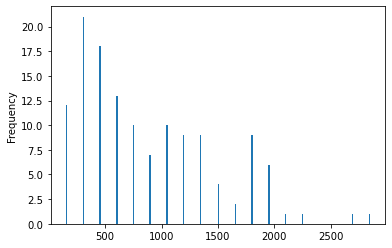

In [32]:
a= df_u[(df_u['Тариф'] == 'ultra') & 
                               (df_u['Плата больше, руб.']> 0)]['Плата больше, руб.']
a.plot(kind='hist', bins=200)

<AxesSubplot:ylabel='Frequency'>

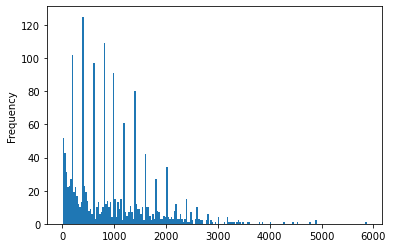

In [33]:
b= df_u[(df_u['Тариф'] == 'smart') & 
                               (df_u['Плата больше, руб.']> 0)]['Плата больше, руб.']
b.plot(kind='hist', bins=200)

<AxesSubplot:ylabel='Frequency'>

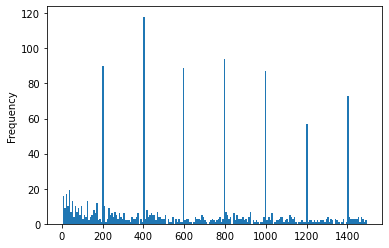

In [34]:
c= df_u[(df_u['Тариф'] == 'smart') &  
                               (df_u['Плата больше, руб.']> 0)&
                               (df_u['Плата больше, руб.']< 1500)]['Плата больше, руб.']
c.plot(kind='hist', bins=200)

#### Вывод: 
    По итогу видим, что в тарифе "Ультра" есть переплаты и большинство делает их до 500 рублей, затем этот показатель снижается и после 2000 становится почти редким - думаю оператору стоит разработать VIP тариф. Всё таки отдавать сумму приближающуюся к 5 тысячам рублей за связь, это расточительно на мой взгляд.
    В графике "Смарт" видим, что большое колличество переплат происходит до 1500 рублей. Это говорит только об одном, что абоненты докупают 5 гигабайт и это видно из графика "с". Незначительному большинству нехватает 2 гигабайта трафика, а после 1000 рублей переплаты сразу видно просадка. Наблюдая нижние кроны графика "с" можно сделать вывод, что 500 минут тоже достаточно не всем - этот вывод можно сделать на фоне того, что на сегодняшний день большинство сообщений проходит через whatssapp, telegramm и twitter.

### Шаг 3. Проанализируйте данные

   Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

        count         mean         std     min     25%     50%     75%     max
Тариф                                                                         
smart  2229.0  1230.522656  785.489800   550.0   550.0   950.0  1667.0  6425.0
ultra   985.0  2070.152284  376.187114  1950.0  1950.0  1950.0  1950.0  4800.0
AxesSubplot(0.125,0.125;0.775x0.755)
Тариф
smart    616994
ultra    141516
Name: Итоговая сумма, руб, dtype: int32


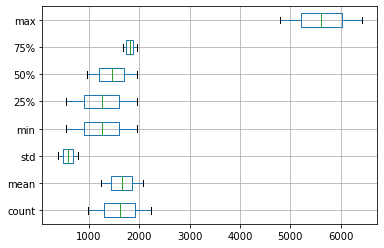

In [35]:
print(df_u.groupby('Тариф')['Итоговая сумма, руб'].describe())
print(df_u.groupby('Тариф')['Итоговая сумма, руб'].describe().boxplot(vert=False))

filter = df_u.groupby('Тариф')['Итоговая сумма, руб']
dispersion = filter.var()
print(dispersion.astype('int'))

AxesSubplot(0.125,0.125;0.775x0.755)
Тариф
smart     34462496
ultra    101751013
Name: Интернет, Мб, dtype: int32


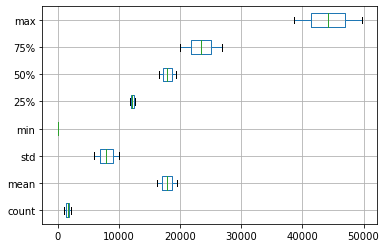

In [36]:
df_u.groupby('Тариф')['Интернет, Мб'].describe()
print(df_u.groupby('Тариф')['Интернет, Мб'].describe().boxplot(vert=False))

filter = df_u.groupby('Тариф')['Интернет, Мб']
dispersion = filter.var()
print(dispersion.astype('int'))

AxesSubplot(0.125,0.125;0.775x0.755)
Тариф
smart     796
ultra    2285
Name: СМС, шт., dtype: int32


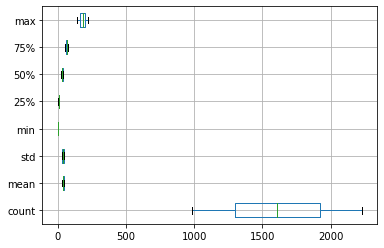

In [37]:
df_u.groupby('Тариф')['СМС, шт.'].describe()
print(df_u.groupby('Тариф')['СМС, шт.'].describe().boxplot(vert=False))

filter = df_u.groupby('Тариф')['СМС, шт.']
dispersion = filter.var()
print(dispersion.astype('int'))

AxesSubplot(0.125,0.125;0.775x0.755)
Тариф
smart    28860
ultra    79896
Name: Звонки, мин., dtype: int32


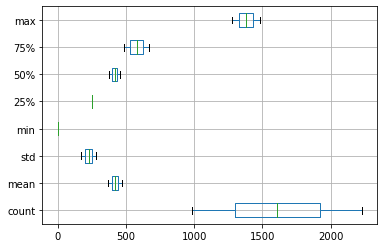

In [38]:
df_u.groupby('Тариф')['Звонки, мин.'].describe()
print(df_u.groupby('Тариф')['Звонки, мин.'].describe().boxplot(vert=False))

filter = df_u.groupby('Тариф')['Звонки, мин.']
dispersion = filter.var()
print(dispersion.astype('int'))

Гистограммы показывают в верхнем значении данные тарифа "Ультра", в нижнем "Смарт". По сути мы видим в медианах усреднённые по обоим тарифам - на основе этих гистограмм можно сконструировать обобщённый тариф. Так же если систематически проводить такие срезы можно увидеть растёт ли потребление заложеных продуктовых норм. К примеру в 2009 году потребление интернета было существенно меньше, нежели в 2018 - этого нет в нашей сегодняшней работе, но в полне актуально. Другими словами продукт можно прогнозировать к примеру на 3-5 лет и закладывать нагрузку на сеть в перспективе. Точно так же увеличивая цену за трафик и на продукт в целом можно косвенно контролировать нагрузки на сеть. 

In [39]:
# код ревьюера
df_u.groupby('Тариф')['Звонки, мин.'].describe()

,count,mean,std,min,25%,50%,75%,max
Тариф,,,,,,,,
smart,2229.0,371.444145,169.885089,0.0,251.0,375.0,485.0,1275.0
ultra,985.0,467.923858,282.660479,0.0,253.0,458.0,670.0,1484.0


Тариф
smart    AxesSubplot(0.125,0.125;0.775x0.755)
ultra    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Итоговая сумма, руб, dtype: object

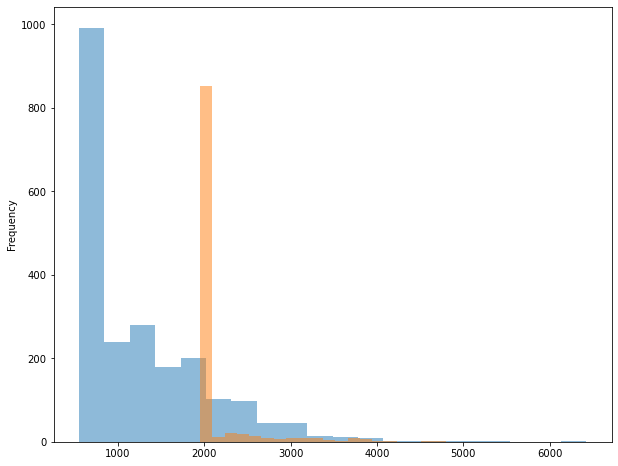

In [40]:
df_u.groupby('Тариф')['Итоговая сумма, руб'].plot.hist(bins=20, alpha=0.5, figsize=(10, 8))


Тариф
smart    AxesSubplot(0.125,0.125;0.775x0.755)
ultra    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Интернет, Мб, dtype: object

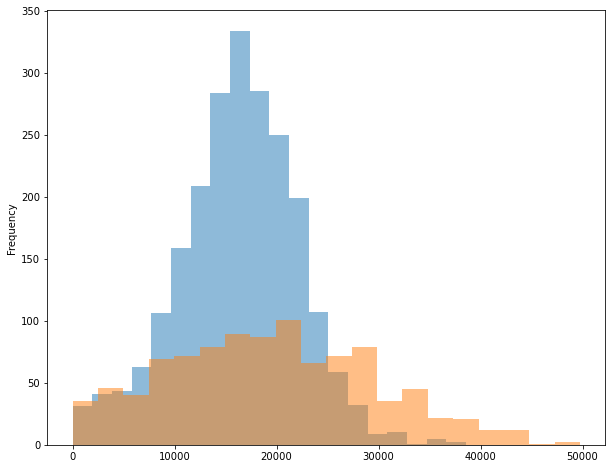

In [41]:
df_u.groupby('Тариф')['Интернет, Мб'].plot.hist(bins=20, alpha=0.5, figsize=(10, 8))

Тариф
smart    AxesSubplot(0.125,0.125;0.775x0.755)
ultra    AxesSubplot(0.125,0.125;0.775x0.755)
Name: СМС, шт., dtype: object

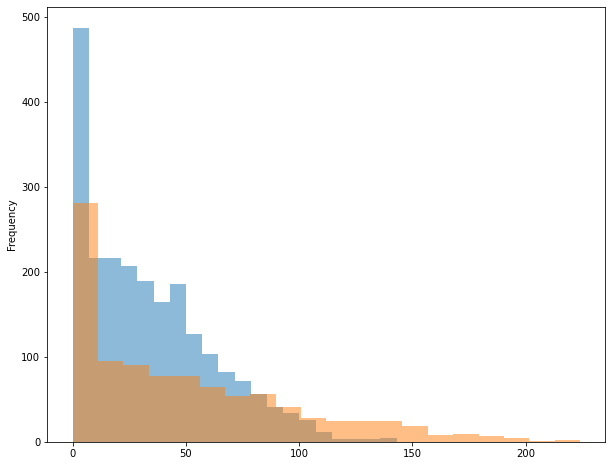

In [42]:
df_u.groupby('Тариф')['СМС, шт.'].plot.hist(bins=20, alpha=0.5, figsize=(10, 8))

Тариф
smart    AxesSubplot(0.125,0.125;0.775x0.755)
ultra    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Звонки, мин., dtype: object

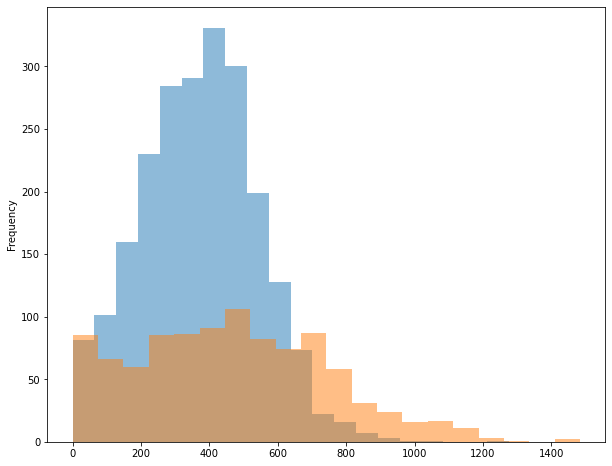

In [43]:
df_u.groupby('Тариф')['Звонки, мин.'].plot.hist(bins=20, alpha=0.5, figsize=(10, 8))

In [44]:
# код ревьюера
df_u.pivot_table(index = 'Тариф', values = ['Звонки, мин.', 'Интернет, Мб', 'СМС, шт.'],
                aggfunc = ['mean', 'std', 'var'])

mean                                   std                \
      Звонки, мин.  Интернет, Мб   СМС, шт. Звонки, мин.  Интернет, Мб   
Тариф                                                                    
smart   371.444145  16208.386990  33.384029   169.885089   5870.476681   
ultra   467.923858  19468.805208  49.363452   282.660479  10087.170752   

                           var                             
        СМС, шт.  Звонки, мин.  Интернет, Мб     СМС, шт.  
Тариф                                                      
smart  28.227876  28860.943580  3.446250e+07   796.812958  
ultra  47.804457  79896.946432  1.017510e+08  2285.266143

### Вывод:
   - Медианное потреблеие интернет_трафика - 16 гб. явно больше заложенных в тарифном плане "Смарт" - 15гб. Большинство имеет запрос на 14-20 гб., по сути из-за этого растёт и медианная итоговая сумма в размере 1257 рублей, что в 2,5 раза больше абоненской плате в 550 рублей. Пользователи тафа "Ультра" напротив, медианно потребляют немного больше 19 гб, что на треть меньше заложенных в базовый тариф 30 гб. Хотя график показывает, что вообщем для этого тарифа потребление трафика укадывается условно равномерно в 30гб и резких экстремумов мы не увидим.
   - О звонках можносказать, что абоненты ультра не в силах ноболтать, да же на половину заложенных в тарифном плане минут. Если в цифрах, медианно это около 500 минут, что не так далеко от абонентов "Смарт" - около 400 минут, хотя большинство "помещаются" в базовый объём.
   - О сообщения сказать практически нечего, вывод мы делали уже ранее - месенджеры рулят.

 ### Шаг 4. Проверьте гипотезы.

#### 4.1 средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [45]:
array1 = df_u[(df_u['Тариф'] == 'smart')]['Итоговая сумма, руб']
array2 = df_u[(df_u['Тариф'] == 'ultra')]['Итоговая сумма, руб']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(array1, array2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 6.540458734619576e-195
Отвергаем нулевую гипотезу


Вывод: Что и  требовалось доказать 

#### 4.2. Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


In [46]:
array1 = df_u[(df_u['Город'] == 'Москва')]['Итоговая сумма, руб']
array2 = df_u[(df_u['Город'] != 'Москва')]['Итоговая сумма, руб']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(array1, array2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.4495612335173296
Не получилось отвергнуть нулевую гипотезу


In [47]:
print('Выручка для Москвы:', array1.sum())
print('Выручка для Регионов:', array2.sum())
# Не придумал как правильно построить гистограмму для городов - получается каша.

Выручка для Москвы: 922332
Выручка для Регионов: 3859603


<AxesSubplot:>

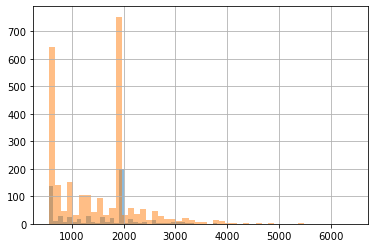

In [48]:
# Наглядно по итоговой сумме
df_u[(df_u['Город'] == 'Москва')]['Итоговая сумма, руб'].hist(bins = 50, alpha = 0.5)
df_u[(df_u['Город'] != 'Москва')]['Итоговая сумма, руб'].hist(bins = 50, alpha = 0.5)


#### Вывод: 
Выручка для Москвы и регонов различна. Регионы дают выручку примерно - 4 объёма Москвы. 

In [49]:
for_person_MSK = array1.sum()/(df_u[(df_u['Город'] == 'Москва')]['Итоговая сумма, руб'].count())
print('Средняя прибыль с абонента в МСК:',for_person_MSK)
for_person_not_MSK = array2.sum()/(df_u[(df_u['Город'] != 'Москва')]['Итоговая сумма, руб'].count())
print('Средняя прибыль с абонента в регионах:',for_person_not_MSK)

Средняя прибыль с абонента в МСК: 1509.545008183306
Средняя прибыль с абонента в регионах: 1482.7518248175184


Пояснение:
    Выбрал метод двух средних генеральных совокупностей. Весь ДатаСет делится на две части, по какому либо критерию из задания. 

### Шаг 5. Общий вывод

    - Абоненты тарифа "Смарт" не помещаются в заданный объём тарифного плана, касательно интернет трафика, ценой 550 рублей. Абоненты  "Ультра" напротив переплачивают за звонки и трафик. И если Абоненты "Смарт" имеют запрос на 20 гб, то абоненты "Ультра" ярко выраженного запроса не имеют, большинство просто помещаются в 30 гб, без ярко выраженных выбросов. Можно заключить, что если бы у абонентов более дешевого тарифного плана была возможность тратить 30 гб трафика они бы осилили и его, следовательно потребность в мобильном интернете можно назвать одинаковой.
    - В среднем это видно по графикам и по выводам из них, большинство абонентов помещаются в 400-500 минут. А смс практически никто не пользуется, вторым дыханием для этой услуги может стать умный дом и gsm-сигнализация.
    - Общая базовая выручка для абонентов "Смарт" - 1226500  "Ультра" - 1922700, а переплаты за весь период - 1695565.
    - Регионы перекрывают доходы от Московских абонентов почти в 4 раза и для регионов эта сумма составляет - 3911867, для Москвы - 932898.
    - Проанализировав оба тарифных плана делаю умозаключение о том, что логичнее и правильнее за предоставление услуг связи будет обратиться к другому поставщику услуг, где тарифный план можно трансформировать по своему желанию.
    - Среднестатистический абонент обоих тарифов тратит 1482 - 1509 рублей в месяц в не зависимости от географической принадлежность. Этот вывод мы сделали на основе дополнения работы. Однако минимальный тариф 550 рублей.
    - Если рассматривать "Мегалайн", как единственного поставщика услуг на территории, то следует выбрать тариф "Смарт" и просто дополнять его по мере необходимости. Имперически рекомендую рассмотреть другого поставщика услуг.